# 1 Exploratory Data Analysis (EDA):

#### basic data exploration

In [4]:
import pandas as pd
df=pd.read_csv(r'C:\Users\Raiyana Reyaz\OneDrive\Desktop\data science assignments\PCA\wine.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
print(df.describe())

             Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270       0.361854         1.590899    5.058090   
std      0.625851    0.998859       0.1

In [9]:

print(df.isnull().sum())
print('-----shape----')
print(df.shape)

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64
-----shape----
(178, 14)


#### Examine Feature Distributions (Histograms, Boxplots, Density Plots)

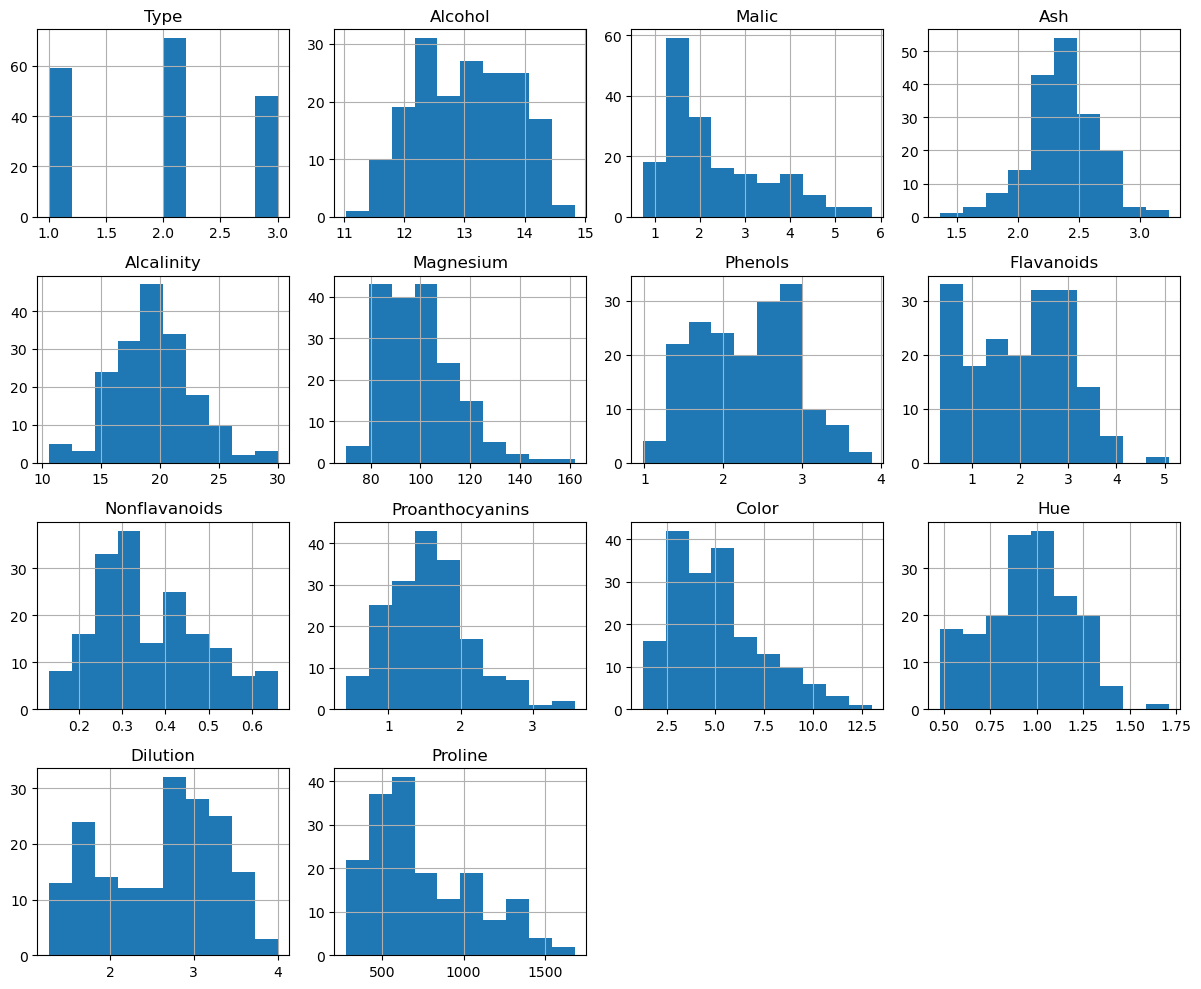

In [10]:
# Histograms
import matplotlib.pyplot as plt

df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

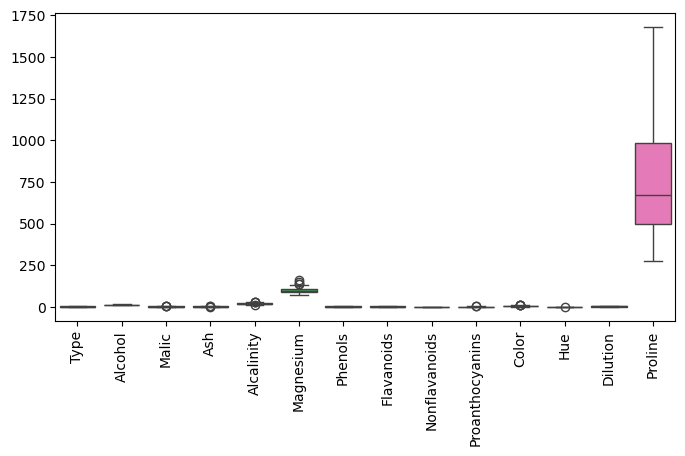

In [15]:
# boxplot
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

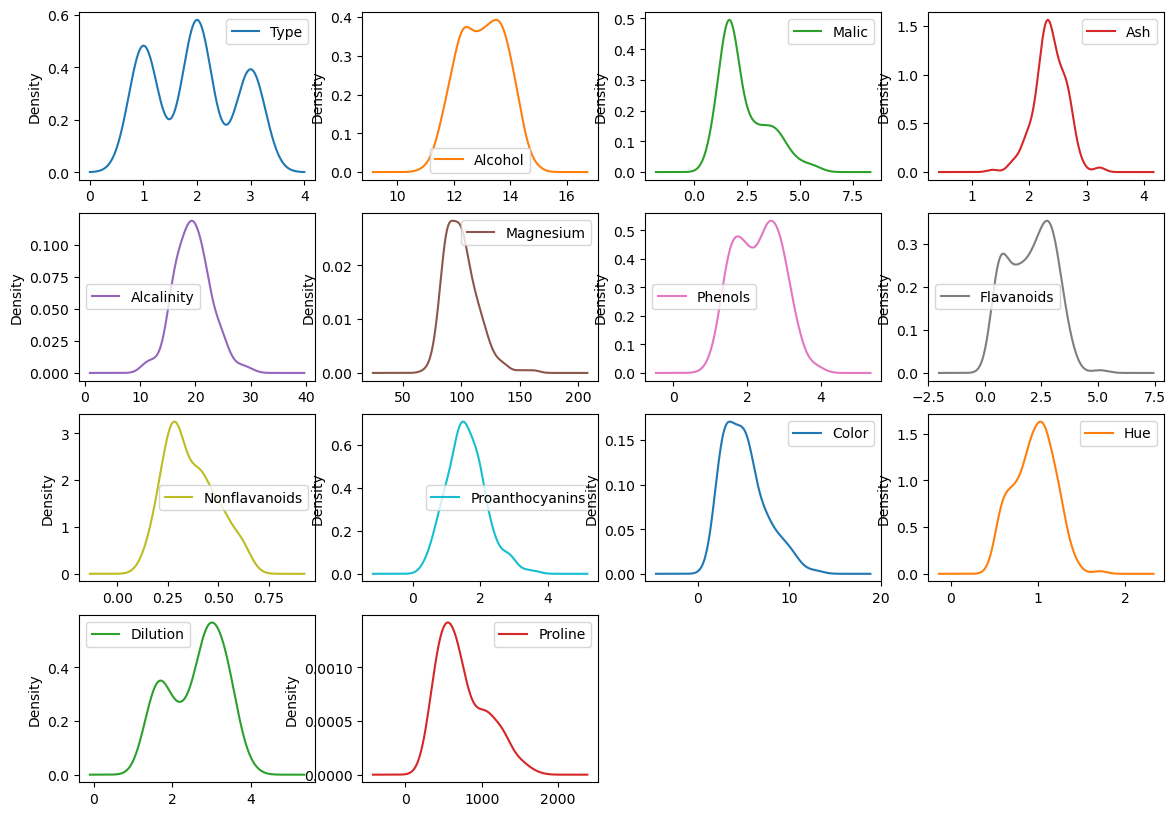

In [16]:
# Density plots (KDE plots)
df.plot(kind='density', subplots=True, layout=(4,4), figsize=(14,10), sharex=False)
plt.show()

#### Investigate Correlations Between Features

In [17]:
#Correlation Matrix
corr = df.corr()
print(corr)

                     Type   Alcohol     Malic       Ash  Alcalinity  \
Type             1.000000 -0.328222  0.437776 -0.049643    0.517859   
Alcohol         -0.328222  1.000000  0.094397  0.211545   -0.310235   
Malic            0.437776  0.094397  1.000000  0.164045    0.288500   
Ash             -0.049643  0.211545  0.164045  1.000000    0.443367   
Alcalinity       0.517859 -0.310235  0.288500  0.443367    1.000000   
Magnesium       -0.209179  0.270798 -0.054575  0.286587   -0.083333   
Phenols         -0.719163  0.289101 -0.335167  0.128980   -0.321113   
Flavanoids      -0.847498  0.236815 -0.411007  0.115077   -0.351370   
Nonflavanoids    0.489109 -0.155929  0.292977  0.186230    0.361922   
Proanthocyanins -0.499130  0.136698 -0.220746  0.009652   -0.197327   
Color            0.265668  0.546364  0.248985  0.258887    0.018732   
Hue             -0.617369 -0.071747 -0.561296 -0.074667   -0.273955   
Dilution        -0.788230  0.072343 -0.368710  0.003911   -0.276769   
Prolin

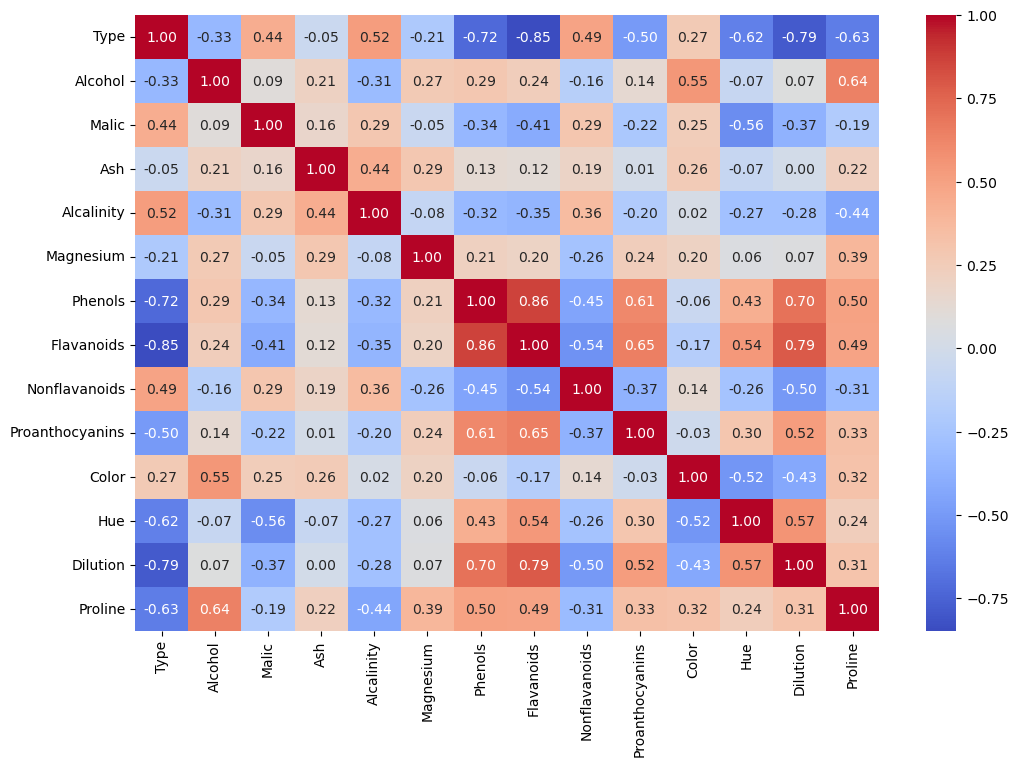

In [18]:
#Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

# 2.Dimensionality Reduction with PCA

#### Standardize the Features (mean = 0, std = 1)

In [19]:
from sklearn.preprocessing import StandardScaler


X = df.drop(columns=["Type"])   # Remove target if classification dataset
# If no target: X = df.copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Implement PCA & Determine the Optimal Components

In [21]:

#Fit PCA
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_scaled)

PCA()

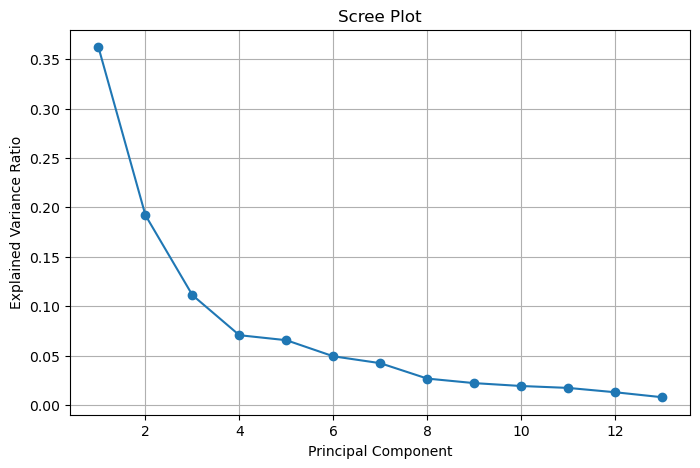

In [22]:
#Scree Plot (Explained Variance Ratio) 
#Shows how much variance each principal component explains.
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), 
         pca.explained_variance_ratio_, marker='o')
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot")
plt.grid(True)
plt.show()

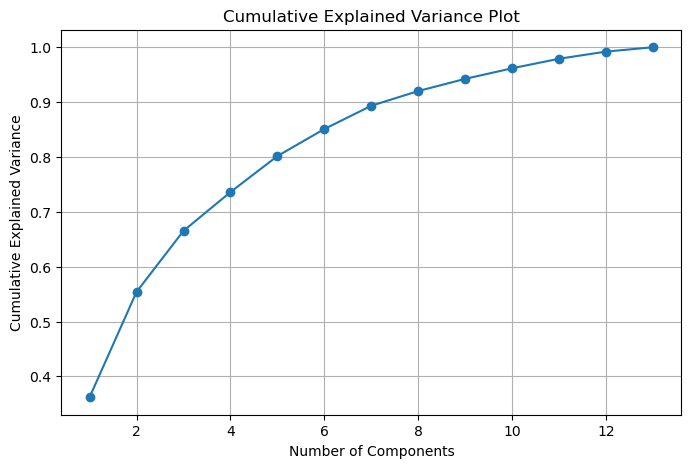

In [23]:
#Cumulative Explained Variance
plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance Plot")
plt.grid(True)
plt.show()

In [24]:
import numpy as np

# Find number of components covering 95% variance
optimal_components = np.argmax(pca.explained_variance_ratio_.cumsum() >= 0.95) + 1
print("Optimal components =", optimal_components)

Optimal components = 10


#### Transform Dataset into Principal Components

In [25]:
pca = PCA(n_components=optimal_components)
X_pca = pca.fit_transform(X_scaled)

print("Original Shape:", X_scaled.shape)
print("Transformed Shape:", X_pca.shape)

Original Shape: (178, 13)
Transformed Shape: (178, 10)


# 3. Clustering with Original Data

C:\Users\Raiyana Reyaz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Raiyana Reyaz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Raiyana Reyaz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Raiyana Reyaz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known

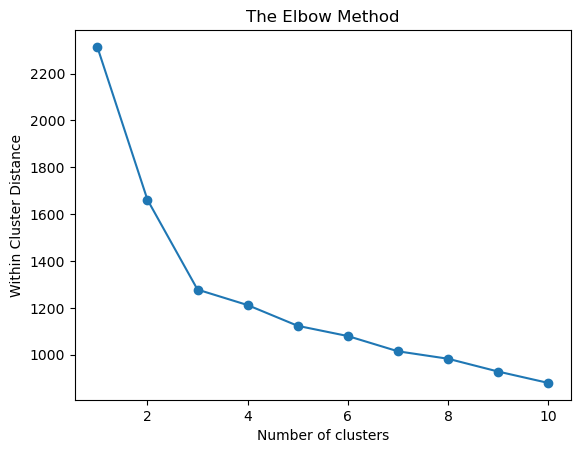

' the optimal number of clusters ≈ 3 for the Wine datase'

In [38]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

list1 = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    list1.append(kmeans.inertia_)

plt.plot(range(1, 11), list1, marker="o")
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Within Cluster Distance")
plt.show()
''' the optimal number of clusters ≈ 3 for the Wine datase'''

In [39]:
# ----- Fit KMeans with 3 clusters -----
kmeans1 = KMeans(n_clusters=3, random_state=10, n_init=500)
y_kmeans = kmeans1.fit_predict(X_scaled)

df["kmeans"] = y_kmeans
df.replace({'kmeans': {0:'Red', 1:'Blue', 2:'Green'}}, inplace=True)
print(df["kmeans"].value_counts())

C:\Users\Raiyana Reyaz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


kmeans
Green    65
Blue     62
Red      51
Name: count, dtype: int64


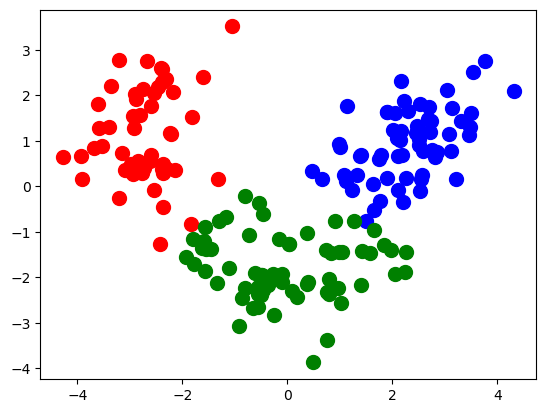

In [40]:
# PCA for visualization 
pca_vis = PCA(n_components=2)
X_vis = pca_vis.fit_transform(X_scaled)

plt.scatter(X_vis[y_kmeans==0, 0], X_vis[y_kmeans==0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_vis[y_kmeans==1, 0], X_vis[y_kmeans==1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_vis[y_kmeans==2, 0], X_vis[y_kmeans==2, 1], s=100, c='green', label='Cluster 3')


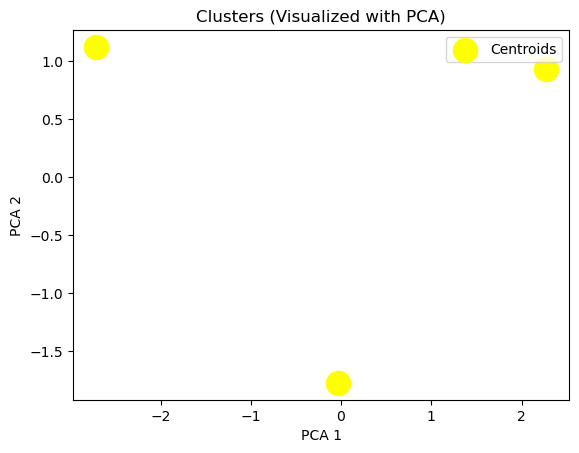

In [43]:
 # Centroids in PCA space
centers_pca = pca_vis.transform(kmeans1.cluster_centers_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], s=300, c='yellow', label='Centroids')
plt.title("Clusters (Visualized with PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()

In [47]:
# Evaluation 
print("Silhouette Score:", silhouette_score(X_scaled, y_kmeans))
''' Clustering quality: POOR'''

Silhouette Score: 0.2848589191898987


' Clustering quality: POOR'

# 4.Clustering with PCA Data

In [49]:
# PCA Transform 
pca_clust = PCA(n_components=5)
X_pca_clust = pca_clust.fit_transform(X_scaled)

#KMeans on PCA Data
kmeans_pca = KMeans(n_clusters=3, random_state=10, n_init=500)
pca_labels = kmeans_pca.fit_predict(X_pca_clust)

df["Cluster_PCA"] = pca_labels

C:\Users\Raiyana Reyaz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


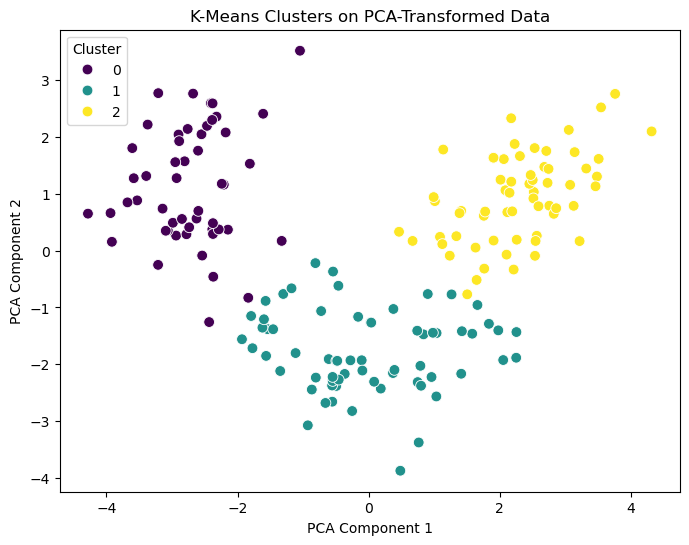

In [50]:
# Visualization of PCA clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_pca_clust[:, 0],
    y=X_pca_clust[:, 1],
    hue=pca_labels,
    palette="viridis",
    s=60
)
plt.title("K-Means Clusters on PCA-Transformed Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()


In [51]:
#4. Evaluation 
sil_pca = silhouette_score(X_pca_clust, pca_labels)
print("Silhouette Score (PCA data):", sil_pca)

Silhouette Score (PCA data): 0.3690763194699229


In [52]:
# The PCA-transformed data gave a higher silhouette score,the clusters were more separated and compact. 
# Overall, clustering performed better after applying PCA.

# 5. Comparison and Analysis:

 #### Comparison of clustering results
Clustering on the PCA-transformed data performed better than clustering on the original dataset, with a higher silhouette score
 

#### Similarities or differences

Both methods formed 3 clusters, but the PCA-based clusters were more clearly separated and 
less overlapping than the clusters formed directly on the original data.

#### Impact of dimensionality reduction
PCA removed noise and redundant features, making the data more compact. This helped the clustering algorithm form clearer and more meaningful groups.

#### Trade-offs between PCA and original data
Clustering on the original data keeps all information but may suffer from high dimensional noise. 
PCA simplifies the data and improves clustering performance, but it loses some original feature interpretability since the new components do not have direct real-world meaning.

# 6. Conclusion and Insights

#### Key findings and insights

The clustering done on the PCA-transformed data performed better than clustering on the original dataset. PCA helped reduce noise and redundancy, which resulted in clearer and more separated clusters. Overall, dimensionality reduction improved clustering quality.

#### Practical implications of PCA + clustering

In real data analysis, PCA helps simplify complex datasets by keeping only the most important information. This makes clustering more accurate and faster, especially when dealing with many features. It also helps in visualizing high-dimensional data in 2D or 3D.

#### Recommendations
Use clustering on the original dataset when you want to preserve all features and need interpretability. Use PCA before clustering when the dataset has many features, high correlation, or noise — because PCA improves cluster performance and makes patterns easier to identify.